# The Best Neighborhood in Pittsburgh

### Introduction

In this project, our group, [group_name], created a metric to find the "best" neighborhood in Pittsburgh. Using databases that measure education, traffic, baseball field listings and 2020 census data, we each made our own submetrics that find the best neighborhood in that particular regard. In this presentation, we'll go over each individual submetric, and explain how these metrics were combined for the final metric

### The Metric

Combining these submetrics we just explained, we can find the best neighborhood using a weighted average of the form:

rating = w1*(school_rating) + w2*(traffic_rating) + w3*(baseball_rating)

We decided that the most important metric was education, followed by traffic, followed by baseball fields. As such, w1 = .5, w2 = .3, w3 = .2, resulting in the final formula:

rating = .5*(school_rating) + .3*(traffic_rating) + .2*(baseball_rating)

### The Results

In [11]:
#Write code here that graphs best neighborhoods
import pandas as pd
import numpy as np
hoods = pd.read_csv("neighborhoods.csv")
%matplotlib inline
import matplotlib.pyplot as plt

# Put your stored variables here
%store -r scores
%store -r bestRate
%store -r traffic_grades
%store -r neighborhoods_percentages_dict

#Formatting Baseball Data
bases = [None] * len(scores)
for i in range(len(scores)):
    bases[i] = (scores[i][0], scores[i][1]/bestRate*100)
    
school_percentages = []

for neighborhood, percentage in neighborhoods_percentages_dict.items():
    school_percentages.append((neighborhood, percentage))

# Calculate bases using the parsed percentages
bases_school = [(neighborhood, percentage * bestRate) for neighborhood, percentage in school_percentages]

finalBases_school = dict(bases_school)
    

    
#print(neighborhoods_percentages_dict)
    
#print(finalBases)
# End Format

finalScores = {}

for index, row in hoods.iterrows():
    trafficScore = 0
    schoolScore = finalBases.get(row['Neighborhood'], 0)
    baseScore = 0
    
    # Boilerplate code for setting the score variable
    if row['Neighborhood'] not in finalBases:
        #print(row['Neighborhood'])
        baseScore = 0
    else:
        baseScore = finalBases[row['Neighborhood']]
    
    if row['Neighborhood'] not in traffic_grades:
        trafficScore = 0
    else:
        trafficScore = traffic_grades[row['Neighborhood']]
        
    if row['Neighborhood'] not in neighborhoods_percentages_dict:
        schoolScore = 0
    else:
        schoolScore = neighborhoods_percentages_dict[row['Neighborhood']]
    
    finalScores[row['Neighborhood']] = (.5 * schoolScore) + (.3 * trafficScore) + (.2 * baseScore)

 # Last thing to do is change this to a list so that it can be sorted

sortedFinalScores = sorted(finalScores.items(), key=lambda x:x[1], reverse=True)
sortedFinalScores = dict(sortedFinalScores)

print(sortedFinalScores)

{'South Side Flats': 47.88066759798157, 'Squirrel Hill North': 47.84613186387516, 'Point Breeze': 47.57334535908604, 'Sheraden': 47.21298964338846, 'Brighton Heights': 47.15408811083806, 'Morningside': 46.51229891283687, 'Greenfield': 46.201549206649496, 'Beechview': 44.63034343243597, 'Highland Park': 44.49528997342313, 'Lincoln-Lemington-Belmar': 44.461521044514114, 'Brookline': 43.93637704152603, 'Overbrook': 43.92764070352236, 'Carrick': 43.61919553242432, 'South Side Slopes': 43.56438628033932, 'Central Northside': 43.35203692171712, 'Point Breeze North': 43.28269149782415, 'Marshall-Shadeland': 43.031586256347246, 'Stanton Heights': 41.69093096180283, 'Crafton Heights': 41.1504684570468, 'Perry North': 40.85276473859512, 'Shadyside': 39.55073993282231, 'Windgap': 36.513244054310015, 'Beltzhoover': 35.34391139563731, 'Fineview': 33.27821478195018, 'Allegheny Center': 33.097896991315615, 'Hazelwood': 32.922078041265685, 'Lower Lawrenceville': 32.770663755724776, 'Elliott': 32.68355

This is a bar graph of the grades of each neighborhood


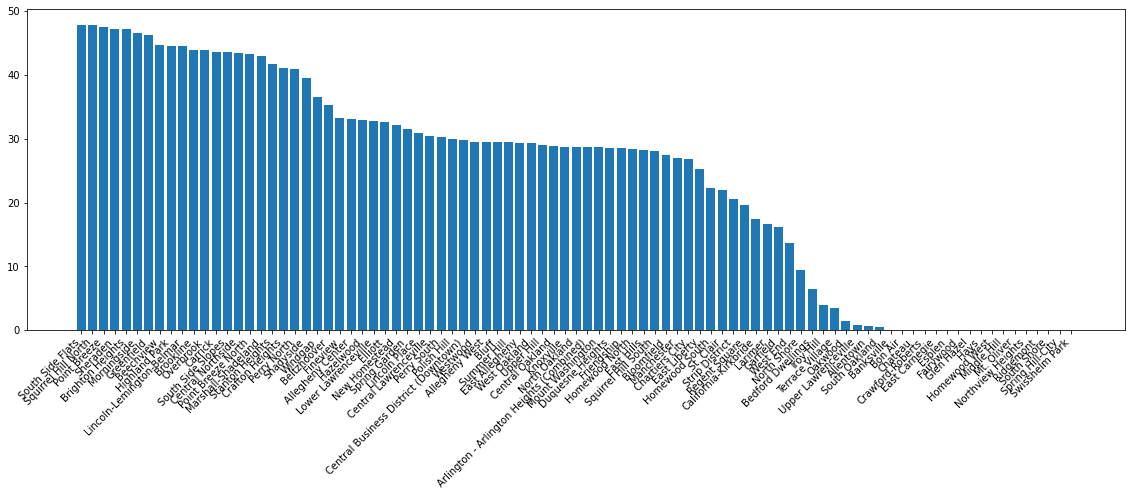

In [12]:
def cm_to_inch(value):
    return value/2.54

names = list(sortedFinalScores.keys())
values = list(sortedFinalScores.values())

print('This is a bar graph of the grades of each neighborhood')

plt.figure(figsize=(cm_to_inch(50), cm_to_inch(15)))
plt.bar(range(len(sortedFinalScores)),values,tick_label=names)
plt.xticks(rotation=45, ha='right')
plt.show()